In [20]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import LeastSquares
import matplotlib.ticker as ticker



data = np.loadtxt("Am241_50mm2.txt")
V_bias = data[:,0]
fwhm = data[:,3]
err_fwhm = data[:,4]
ch = data[:,1]
errch = data[:,2]
fwhm_ch = data[:,5]*10**3
err_fwhmch=data[:,6]*10**3

err_vbias = []

for i in range(len(V_bias)):
    err_vbias.append(0.5/100*V_bias[i])

print(V_bias[:13])    
#print(fwhm[2:6])
#print(sum(fwhm[2:6])/len(fwhm[2:6]))

[10.3  14.43 18.26 22.88 28.54 33.07 38.06 43.72 49.21 54.71 59.77 64.3
 70.  ]


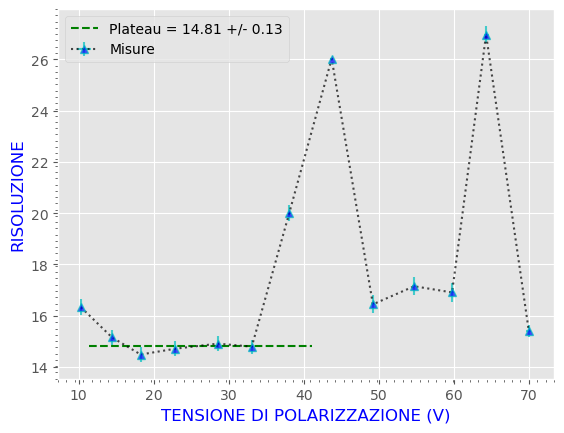

In [22]:

V_bias=V_bias[:13]
fwhm=fwhm[:13]
err_vbias=err_vbias[:13]
err_fwhm=err_fwhm[:13]

fig, ax = plt.subplots()

plt.errorbar(V_bias, fwhm, xerr= list(map(lambda x: x, err_vbias)), yerr= err_fwhm, linestyle=":", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("RISOLUZIONE", color="b")


pesi = list(map(lambda x: 1/x**2, err_fwhm))
plateau = 0
#m = 6 #da che misura calcolo plateau

for i in range(len(ch[1:6])):
    plateau = plateau + fwhm[i+1]*pesi[i+1]

plateau = plateau/sum(pesi[1:6])
err_plateau = 1/np.sqrt(sum(pesi[1:6]))

plt.hlines(plateau, V_bias[1]-3, V_bias[6]+3, linestyle="--", color="g", label=f"Plateau = {round(plateau,2)} +/- {round(err_plateau,2)}")


plt.legend(loc = "upper left")
plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()




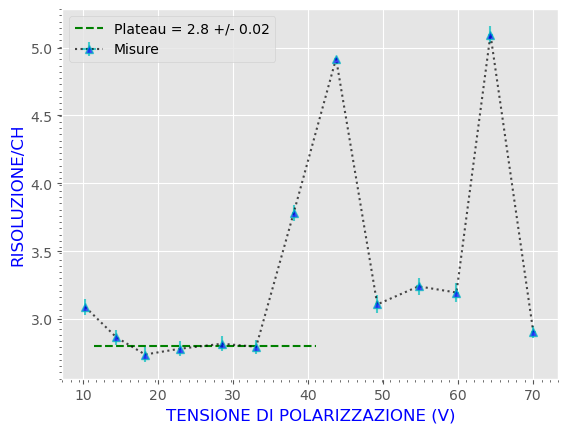

In [26]:
fwhm_ch=fwhm_ch[:13]
err_fwhmch=err_fwhmch[:13]
print()
fig, ax = plt.subplots()

plt.errorbar(V_bias, fwhm_ch, xerr= list(map(lambda x: x, err_vbias)), yerr= err_fwhmch, linestyle=":", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.grid("on")
plt.xlabel("TENSIONE DI POLARIZZAZIONE (V)", color="b")
plt.ylabel("RISOLUZIONE/CH", color="b")


pesi = list(map(lambda x: 1/x**2, err_fwhmch))
plateau = 0
#m = 6 #da che misura calcolo plateau

for i in range(len(ch[1:6])):
    plateau = plateau + fwhm_ch[i+1]*pesi[i+1]

plateau = plateau/sum(pesi[1:6])
err_plateau = 1/np.sqrt(sum(pesi[1:6]))

plt.hlines(plateau, V_bias[1]-3, V_bias[6]+3, linestyle="--", color="g", label=f"Plateau = {round(plateau,2)} +/- {round(err_plateau,2)}")


plt.legend(loc = "upper left")
plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()


